In [7]:
%matplotlib inline
import calcbench as cb
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
tickers = cb.tickers(index="DJIA")

In [3]:
clauses = [
    {"parameter": "filingDate", "operator": 1, "value": "2021-01-26"},
    {"parameter": "fiscalYear", "operator": 1, "value": 2021},
]

d = cb.non_XBRL_numeric(company_identifiers=["MMM"], clauses=clauses)

In [10]:
data = pd.DataFrame()
for ticker in tqdm(tickers):
    for fiscal_year in tqdm(range(2008, 2020)):
        clauses = [
            {"parameter": "fiscalYear", "operator": 1, "value": fiscal_year},
            {"parameter": "filingType", "operator": 1, "value": "Earnings"},
            {"parameter": "fiscalPeriod", "operator": 1, "value": "Y"},
        ]
        d = cb.non_XBRL_numeric(company_identifiers=[ticker], clauses=clauses)
        data =pd.concat([data, d])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

In [11]:
unique_tags = data.groupby(["ticker", "fiscal_year"])["extract_tag"].nunique()

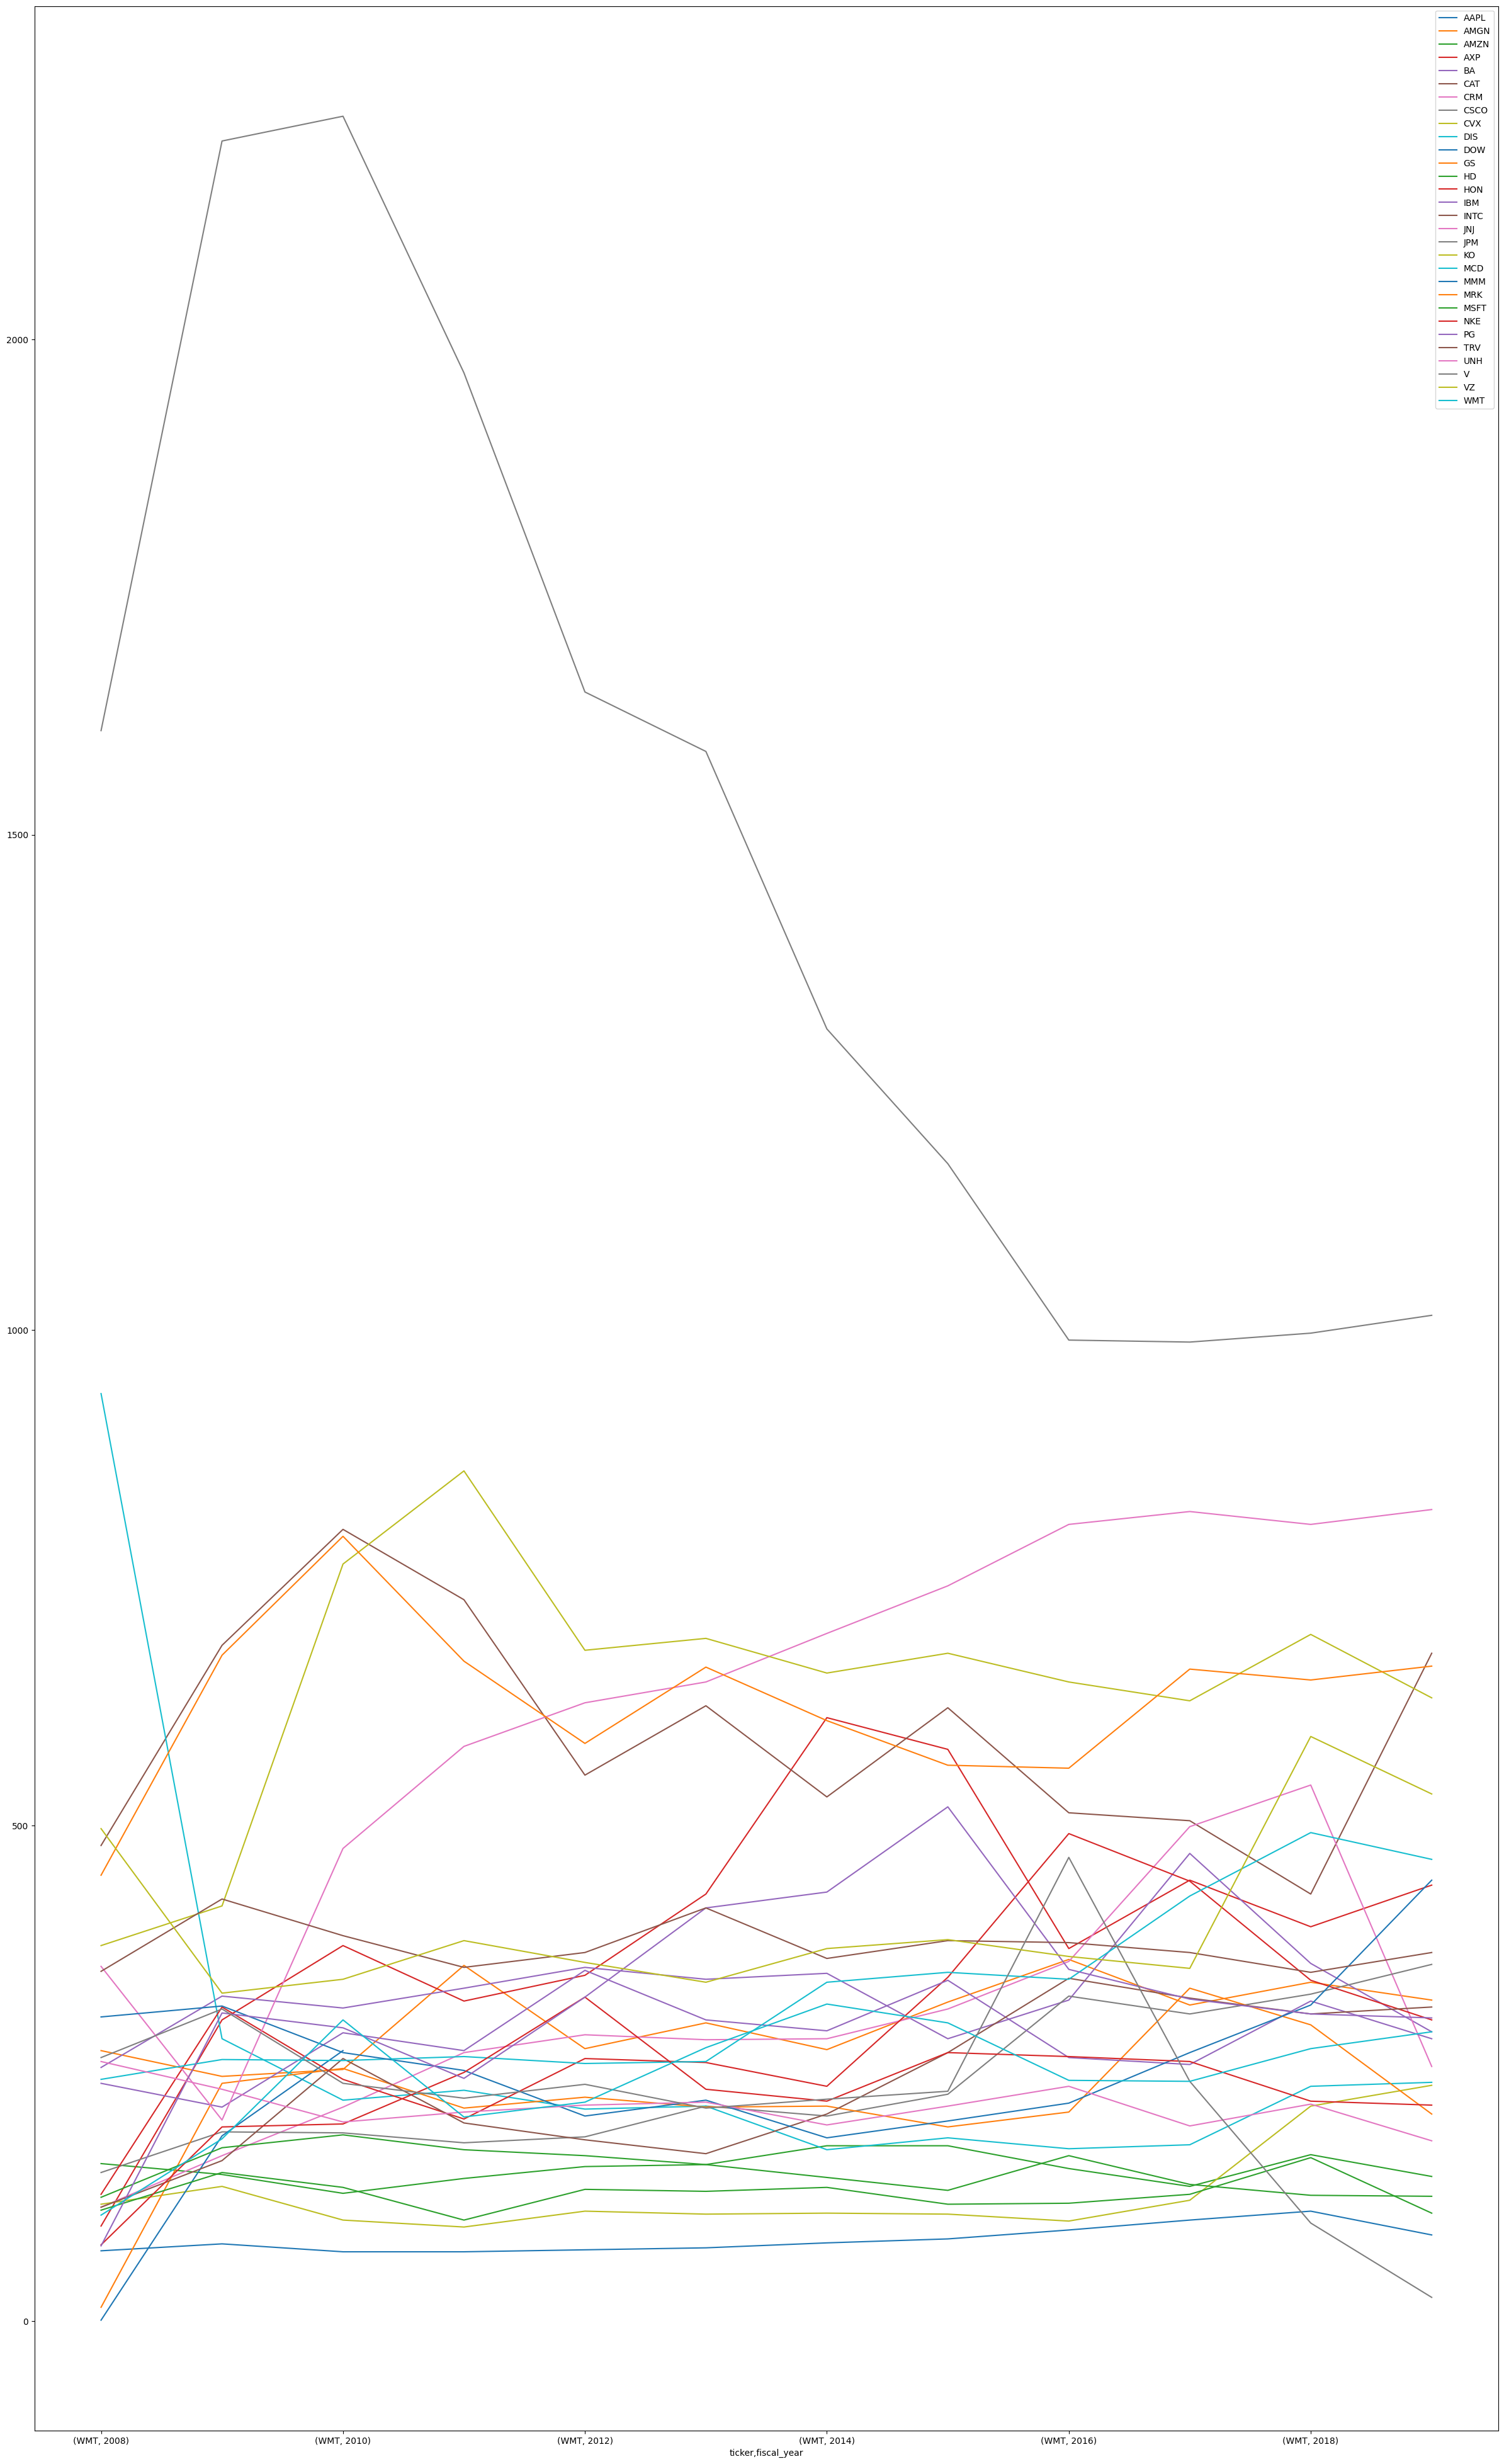

In [12]:
p = unique_tags.groupby("ticker").plot(legend=True, figsize=(30, 50))